# Import libraries

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Download data

In [23]:
years = 15

end_date = datetime.now()
start_date = end_date - timedelta(days=years*365)

In [24]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [25]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
adj_close_df.head()

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2008-12-01,61.450481,49.282413,75.650002,23.557209,30.400911
2008-12-02,63.815403,49.581364,76.949997,24.344484,31.599167
2008-12-03,65.349617,49.347389,76.180000,25.035547,32.413078
2008-12-04,63.837864,49.561836,75.500000,24.326996,31.448441
2008-12-05,65.806145,49.197933,74.519997,25.315468,32.563793


# 2. Compute the log returns

In [31]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns.dropna(inplace=True)
log_returns.head()

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2008-12-02,0.037763,0.006048,0.017038,0.032873,0.038658
2008-12-03,0.023757,-0.004730,-0.010057,0.027991,0.025431
2008-12-04,-0.023405,0.004336,-0.008966,-0.028710,-0.030213
2008-12-05,0.030367,-0.007369,-0.013065,0.039829,0.034852
2008-12-08,0.034318,-0.004368,0.022294,0.038636,0.037475


# 3. Create equally weighted portfolio

## 3.1. Creating the weights

In [33]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

## 3.2. Computing portfolio returns

In [38]:
historical_returns = log_returns @ weights
historical_returns

Date
2008-12-02    0.026476
2008-12-03    0.012479
2008-12-04   -0.017392
2008-12-05    0.016923
2008-12-08    0.025671
                ...   
2023-11-21    0.000285
2023-11-22    0.001757
2023-11-24    0.000130
2023-11-27    0.001765
2023-11-28    0.002969
Length: 3773, dtype: float64

## 3.3. Computing returns every X days (we chose 20 days)

In [47]:
days = 20
range_returns = historical_returns.rolling(window=days).sum()
range_returns.dropna(inplace=True)
range_returns

Date
2008-12-30    0.089554
2008-12-31    0.072084
2009-01-02    0.078315
2009-01-05    0.090420
2009-01-06    0.078715
                ...   
2023-11-21    0.051908
2023-11-22    0.065182
2023-11-24    0.071998
2023-11-27    0.072481
2023-11-28    0.070169
Length: 3754, dtype: float64

# 4. Calculate the VaR using Historical Method

In [84]:
confidence_level = 0.95

VaR = np.percentile(range_returns, 100*(1-confidence_level))*portfolio_value
VaR

-43067.47520470008

# 5. Visualize the distribution of the returns

In [71]:
range_returns_money = range_returns*portfolio_value

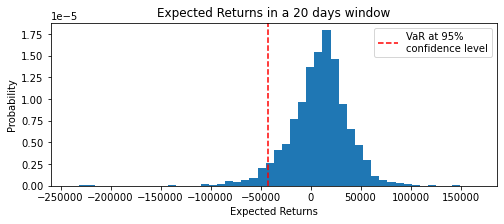

In [85]:
plt.figure(figsize=(8, 3))
plt.hist(range_returns_money, bins=50, density=True)
plt.xlabel('Expected Returns')
plt.ylabel('Probability')
plt.title(f'Expected Returns in a {days} days window')
plt.axvline(VaR, color='r', linestyle='dashed', 
            label=f'VaR at {confidence_level:.0%}\nconfidence level')
plt.legend()
plt.show()

**Note**:<br>
Compared to the Monte Carlo Simulation method, we see that here the distribution has longer tails due to the fact that we are taking all the returns, instead of simulating returns with the mean and standard deviation from the past. This implies that here outliers are shown in the distribution, while in the Monte Carlo method there are not outliers.

# 6. Compile everything in just one cell to try with different windows

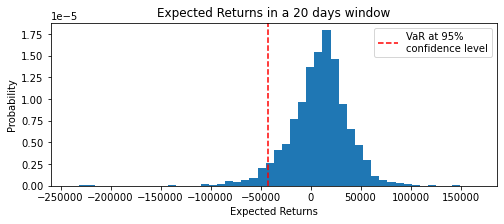

In [91]:
# Set parameters
days = 20
confidence_level = 0.95

# Compute window returns
range_returns = (historical_returns.rolling(window=days).sum())
range_returns.dropna(inplace=True)
range_returns_money = range_returns*portfolio_value

# Calculate VaR
VaR = np.percentile(range_returns, 100*(1-confidence_level))*portfolio_value

# Plot distribution of returns and VaR
plt.figure(figsize=(8, 3))
plt.hist(range_returns_money, bins=50, density=True)
plt.xlabel('Expected Returns')
plt.ylabel('Probability')
plt.title(f'Expected Returns in a {days} days window')
plt.axvline(VaR, color='r', linestyle='dashed', 
            label=f'VaR at {confidence_level:.0%}\nconfidence level')
plt.legend()
plt.show()

# 7: Acknowledgement

This tutorial has been conducted following the video 'Value at Risk (VaR) In Python: Historical Method', by Ryan O'Connell. <br>
Video available at: <br>
https://www.youtube.com/watch?v=jZJsPi4j7wQ&list=PLPe-_ytPHqyg4ap7hysD4pOBJMz0mnLly&index=6&ab_channel=RyanO%27Connell%2CCFA%2CFRM